<a name='1'></a>
## 1 - Packages

In [37]:
# Package imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from dnn_app_utils_v3 import *

np.random.seed(1)

<a name='2'></a>
# 2 - Load the Dataset and Normalization

In [38]:
filepath="FinalData.csv"

df = pd.read_csv(filepath, delimiter=';', decimal='.')

feature_cols = ['CO2_livingroom', 'light_livingroom', 'rh_livingroom', 
                'temp_livingroom', 'temp_outdoor']

X = df[feature_cols].values.astype(float)
y = df['presence_livingroom'].values.astype(float)

# Split into train and test (80-20)
n_samples = X.shape[0]
n_train = int(0.8 * n_samples)

indices = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(indices)

train_set_x_orig, test_set_x_orig = X[indices[:n_train]], X[indices[n_train:]]
train_set_y_orig, test_set_y_orig = y[indices[:n_train]], y[indices[n_train:]]

In [39]:
# Normalization process
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Scaler for FEATURES (X)
# Use 'x_scaler' for input data
x_scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = x_scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = x_scaler.transform(test_set_x_orig) # Use transform for test set

# 2. Scaler for LABELS (Y)
# Use 'y_scaler' for output data
y_scaler = MinMaxScaler(feature_range=(0,1))

# Reshape Y from (m,) to (m, 1) for the MinMaxScaler's fit_transform method
train_set_y_reshaped = train_set_y_orig.reshape(-1, 1)
test_set_y_reshaped = test_set_y_orig.reshape(-1, 1)

# Fit and transform Y data
train_set_y_normalized = y_scaler.fit_transform(train_set_y_reshaped)
test_set_y_normalized = y_scaler.transform(test_set_y_reshaped)

# Transpose X data for the Deep NN (shape: (n_x, m))
train_set_x_normalized = train_set_x_normalized.T     
test_set_x_normalized = test_set_x_normalized.T

# Transpose Y data for the Deep NN (shape: (1, m))
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T

In [40]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 1189
Number of testing examples: m_test = 298
train_set_x shape: (5, 1189)
train_set_y shape: (1, 1189)
test_set_x shape: (5, 298)
test_set_y shape: (1, 298)


<a name='5'></a>
## 3 - L-layer Neural Network


In [41]:
### CONSTANTS ###
layers_dims = [5, 20, 10, 5, 1] #  4-layer model

In [42]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.85, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

<a name='5-1'></a>
## Train the model
The cost should decrease on every iteration. 

In [43]:
parameters, costs = L_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims, num_iterations = 3000, print_cost = False)

Cost after iteration 2999: 0.5881293426213211


In [44]:
pred_train = predict(train_set_x_normalized, train_set_y_normalized, parameters)

Accuracy: 62.239619660210366


In [45]:
pred_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

Accuracy: 62.00620394129312


In [46]:
# Step 1: Get the normalized prediction (Y_prediction_test will have shape (1, 298))
# Assuming the 'predict' function signature is 'predict(X_test, Y_test, parameters)'
Y_prediction_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

# Step 2: Use the 'y_scaler' to inverse transform the prediction.
# The prediction must be transposed back to (298, 1) before inverse_transform.
Y_prediction_test_real_scale = y_scaler.inverse_transform(Y_prediction_test.T)

Accuracy: 62.00620394129312


<a name='6'></a>
##  6 - Results Analysis

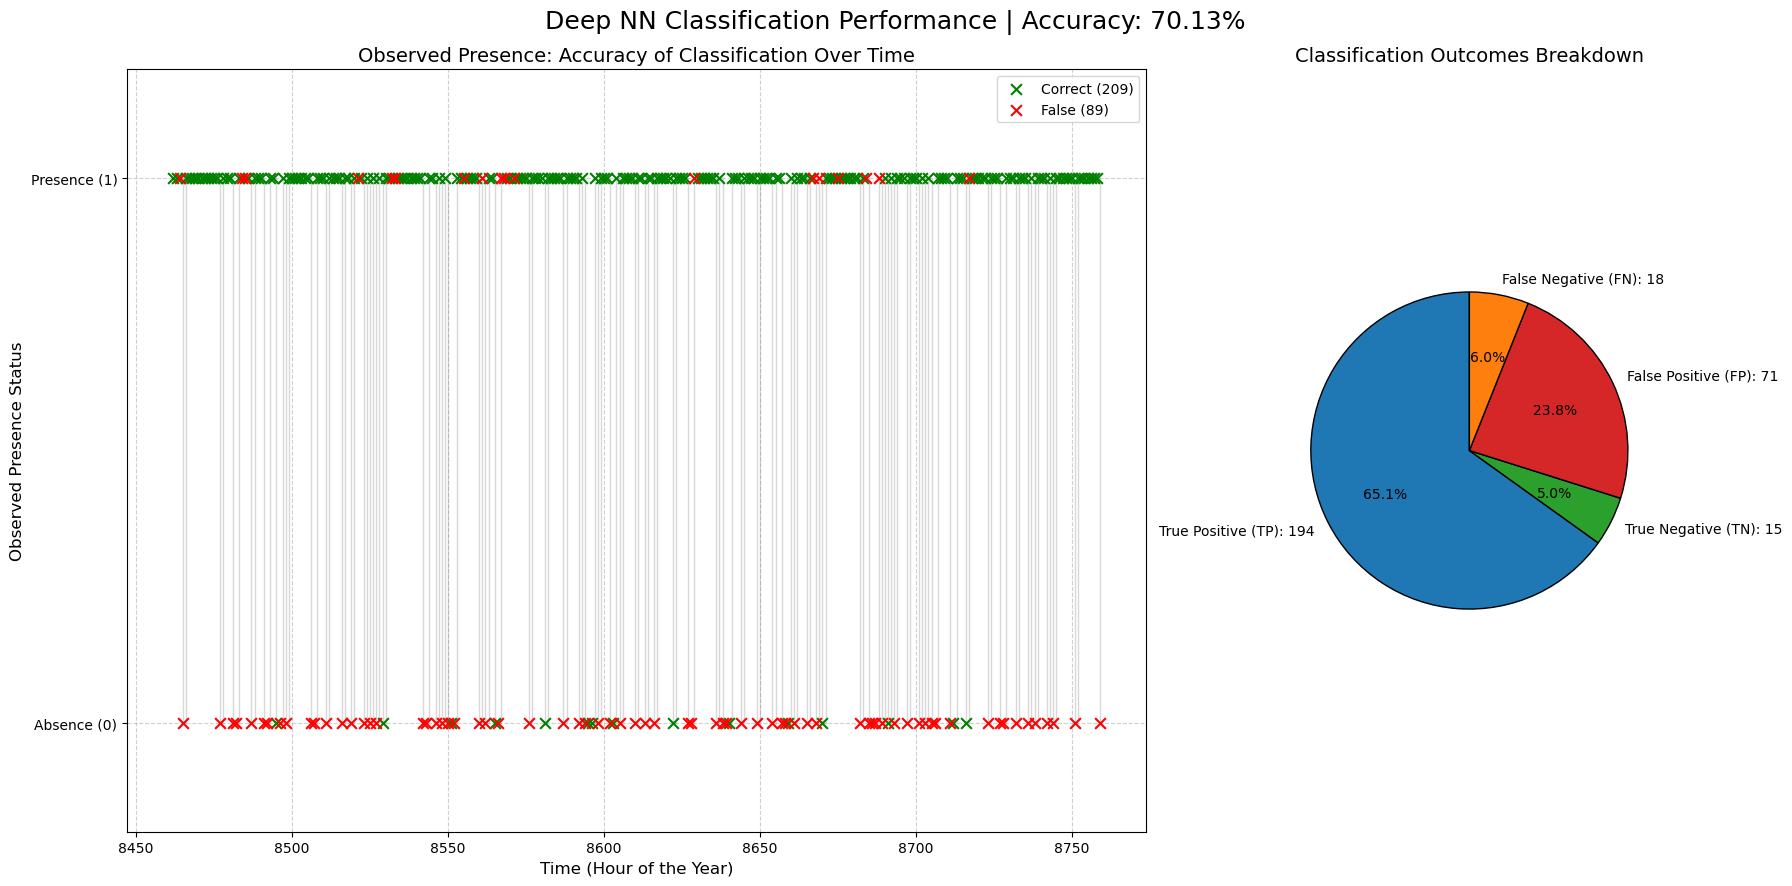

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# --- Assumed Variables from the Notebook (Ensure these are defined) ---
# test_set_y_orig: The original un-normalized test labels (shape: (m,)) - Should be 0 or 1
# Y_prediction_test_real_scale: The inverse-transformed prediction results (shape: (m, 1))

# --- 1. Prepare Data for Plotting ---

# Dimensions and time index
test_size = test_set_y_orig.shape[0]
start_hour = 8760 - test_size  # Assuming test data is the tail end of an 8760-hour year
time_index_hours = np.arange(start_hour, 8760, 1)

# --- 2. Binarize the Predicted Presence ---

# Assuming Y_prediction_test_real_scale is the float prediction (inverse-transformed but still float):
y_pred_float_flat = Y_prediction_test_real_scale.flatten() 

# Binarize the simulated presence using a threshold of 0.5
y_pred_binary = (y_pred_float_flat > 0.5).astype(int)

# The observed data is already assumed to be binary (0 or 1)
y_observed = test_set_y_orig

# --- 3. Calculate and Identify all Outcomes (TP, TN, FP, FN) ---

# Total Prediction Results
correctly_predicted = (y_pred_binary == y_observed)
falsely_predicted = (y_pred_binary != y_observed)

# True Positives (TP): Predicted 1, Observed 1
tp_indices = np.where(np.logical_and(y_pred_binary == 1, y_observed == 1))[0]
tp_times = time_index_hours[tp_indices]

# True Negatives (TN): Predicted 0, Observed 0
tn_indices = np.where(np.logical_and(y_pred_binary == 0, y_observed == 0))[0]
tn_times = time_index_hours[tn_indices]

# False Positives (FP): Predicted 1, Observed 0
fp_indices = np.where(np.logical_and(y_pred_binary == 1, y_observed == 0))[0]
fp_times = time_index_hours[fp_indices]

# False Negatives (FN): Predicted 0, Observed 1
fn_indices = np.where(np.logical_and(y_pred_binary == 0, y_observed == 1))[0]
fn_times = time_index_hours[fn_indices]

# Combine Correct and False for easy plotting
correct_times = np.concatenate((tp_times, tn_times))
false_times = np.concatenate((fp_times, fn_times))

correct_observed = y_observed[np.concatenate((tp_indices, tn_indices))]
false_observed = y_observed[np.concatenate((fp_indices, fn_indices))]

# Total error count and accuracy for title
total_errors = len(fp_indices) + len(fn_indices)
total_correct = len(tp_indices) + len(tn_indices)
accuracy = total_correct / test_size * 100

# --- 4. Create the Figure with Two Subplots ---

fig = plt.figure(figsize=(18, 9))
# Use GridSpec to define a custom layout: 1 big subplot on the left, 1 small one on the right
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1]) 
ax_scatter = fig.add_subplot(gs[0, 0])
ax_pie = fig.add_subplot(gs[0, 1])

# Set General Title
fig.suptitle(f'Deep NN Classification Performance | Accuracy: {accuracy:.2f}%', fontsize=18, y=0.98)


# 4.1. Scatter Plot: Prediction Accuracy Over Time
# Plot Correct Predictions (Green 'X')
ax_scatter.scatter(correct_times, correct_observed,
                   marker='x', s=60, color='green', linewidth=1.5,
                   label=f'Correct ({total_correct})', zorder=5)

# Plot False Predictions (Red 'X')
ax_scatter.scatter(false_times, false_observed,
                   marker='x', s=60, color='red', linewidth=1.5,
                   label=f'False ({total_errors})', zorder=6) # Zorder ensures errors are on top

# Add faint step line to show the overall trend of the observed data
ax_scatter.step(time_index_hours, y_observed, 
                color='gray', 
                linewidth=1, 
                alpha=0.3,
                where='post')


# Scatter Plot Styling
ax_scatter.set_title('Observed Presence: Accuracy of Classification Over Time', fontsize=14)
ax_scatter.set_xlabel('Time (Hour of the Year)', fontsize=12)
ax_scatter.set_ylabel('Observed Presence Status', fontsize=12)
ax_scatter.set_yticks([0, 1]) 
ax_scatter.set_yticklabels(['Absence (0)', 'Presence (1)'])
ax_scatter.legend(loc='upper right', fontsize=10)
ax_scatter.grid(True, linestyle='--', alpha=0.6)
ax_scatter.set_ylim(-0.2, 1.2) # Give a little padding


# 4.2. Pie Chart: Confusion Matrix Breakdown
pie_sizes = [len(tp_indices), len(tn_indices), len(fp_indices), len(fn_indices)]
pie_labels = [
    f'True Positive (TP): {len(tp_indices)}',
    f'True Negative (TN): {len(tn_indices)}',
    f'False Positive (FP): {len(fp_indices)}',
    f'False Negative (FN): {len(fn_indices)}'
]
pie_colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'] # Blue, Green, Red, Orange

# Plot the pie chart
ax_pie.pie(pie_sizes, 
           labels=pie_labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=pie_colors, 
           wedgeprops={'edgecolor': 'black'})
ax_pie.set_title('Classification Outcomes Breakdown', fontsize=14)
ax_pie.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.


plt.tight_layout()
plt.show()